Dieser Quellcode ist Bestandteil der Dissertation von Ines Reinecke
vorgelegt am 11.07.2023 an der Technischen Universität Dresden, Medizinische Fakultät

Dieser Code enthält die Visualisierung der in OHDSI Studien verwendeten Datengruppen als Scatterplot in Kombination mit einem Histogramm zur Anzeige der Summe der Datengruppen über alle OHDSI Studien hinweg. 

Dieser Code ist in Anlehnung an die Idee zur Visualisierung von Najia Ahmadi implementiert wurden.
Vorbild dieser Visualisierung ist das GitHub Projekt von Najia Ahmadi, Release V 1.0, hier: https://github.com/NajiaAhmadi/VisualisationWithPython/releases/tag/v1.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.colors as mcolors

In [2]:
df = pd.read_csv('../data_in/ohdsi_studies_python_prep.csv',skipinitialspace=True, sep=";")

hfont = {'fontname':'Open Sans'}

In [3]:
# Reduzieren der Spalten im Dataframe df, nur die relevanten Spalten behalten
df_sub = df[["author_et_al","publication_year","title","DOI","Diagnosis","Procedure","Laboratory","Observation","Scores","Medication"]]

# Benennung der Spalten für die Datengruppen in deutsch anpassen
german_columns = ["author_et_al", "publication_year", "title", "DOI", "Diagnosen", "Prozeduren", "Laborwerte", "Beobachtungen", "Scores", "Medikation"]

# Spaltennamen im DataFrame ändern
df_sub.columns = german_columns

In [4]:
yes_counts = df_sub.iloc[:, 4:].apply(lambda col: (col == 'yes').sum(), axis=0)
sorted_columns = yes_counts.sort_values(ascending=False).index

# Dataframe mit sortierten Spalten 5 bis 10 für die Datengruppe nach der Häufigkeit der yes pro Spalte 
df_sort_col = df_sub.iloc[:, :4].join(df_sub[sorted_columns])

In [5]:
df_sort_col

,author_et_al,publication_year,title,DOI,Diagnosen,Medikation,Prozeduren,Laborwerte,Beobachtungen,Scores
0,"Kim, Ha Il et al., 2021",2021,Gastrointestinal and Nongastrointestinal Compl...,10.5009/gnl20222,yes,no,yes,no,no,no
1,"Lane, Jennifer C. E. et al., 2021",2021,"Risk of depression, suicide and psychosis with...",10.1093/rheumatology/keaa771,yes,yes,yes,yes,no,no
2,"Morales, Daniel R. et al., 2021",2021,Renin-angiotensin system blockers and suscepti...,10.1016/S2589-7500(20)30289-2,yes,yes,no,no,no,no
3,"Burn, Edward et al., 2020b",2020,"Use of dialysis, tracheostomy, and extracorpor...",10.1101/2020.11.25.20229088,yes,no,yes,no,no,no
4,"You, Seng Chan et al., 2020",2020,Association of Ticagrelor vs Clopidogrel With ...,10.1001/jama.2020.16167,yes,yes,yes,yes,no,no
5,"Burn, Edward et al., 2020a",2020,"Deep phenotyping of 34,128 adult patients hosp...",10.1038/s41467-020-18849-z,yes,yes,no,no,no,no
6,"Lane, Jennifer C.E. et al., 2020",2020,Risk of hydroxychloroquine alone and in combin...,10.1016/S2665-9913(20)30276-9,yes,yes,no,no,yes,yes
7,"Brat, Gabriel A. et al., 2020",2020,International electronic health record-derived...,10.1038/s41746-020-00308-0,yes,no,no,yes,no,no
8,"Kim, Yeesuk et al., 2020",2020,Comparative safety and effectiveness of alendr...,10.1038/s41598-020-68037-8,yes,yes,yes,no,no,no
9,"Kim, Hunmin et al., 2020",2020,Characterization of Anti-seizure Medication Tr...,10.3389/fneur.2020.00409,yes,yes,no,no,no,no


In [6]:
# Sortieren der Daten nach Jahren
df_sorted = df_sort_col.sort_values(by='publication_year', ascending=False)


# Extrahieren der sortierten Jahre und Namen
years_sorted = df_sorted['publication_year'].values
names_sorted = df_sorted['author_et_al'].values

# Erstellen einer Liste von Spaltennamen für die weitere Verarbeitung

columns = ["Diagnosen", "Medikation", "Prozeduren","Laborwerte", "Beobachtungen", "Scores"]


# Erstellen des sortierten Arrays basierend auf den Spaltenwerten
arr_sorted = df_sorted[columns].values.T

# Generierung der x- und y-Daten für den Scatterplot
x = np.repeat(np.arange(len(years_sorted)), len(columns))
y = np.zeros(len(x), dtype=int)

# Erstellen der x_hist_cols für das Balkendiagramm
x_hist_cols = [list(group) for key, group in itertools.groupby(x)]

# Zuweisen der Werte an y basierend auf den Spaltenwerten
for i, col in enumerate(arr_sorted):
    for j, val in enumerate(col):
        if val != 'no':
            y[i * len(years_sorted) + j] = j + 1

# Aufteilen von x und y in Spalten
x_cols = np.split(x, len(columns))
y_cols = np.split(y, len(columns))

y_cols = []
for col in df_sorted.columns[4:]:  # Starten bei der fünften Spalte ('Diagnosis') bis zur letzten Spalte
    y_col = np.where(df_sorted[col] == 'yes', 1, 0)
    y_cols.append(y_col)



In [7]:
# Generierung der Farbpalette
color_palette = plt.cm.coolwarm(np.linspace(0, 1, len(columns)))

# Konvertieren der Farben in Hex-Codes
hex_codes = [mcolors.rgb2hex(color) for color in color_palette]

# Anzeigen der Hex-Codes
for hex_code in hex_codes:
    print(hex_code)

#3b4cc0
#7b9ff9
#c0d4f5
#f2cbb7
#ee8468
#b40426


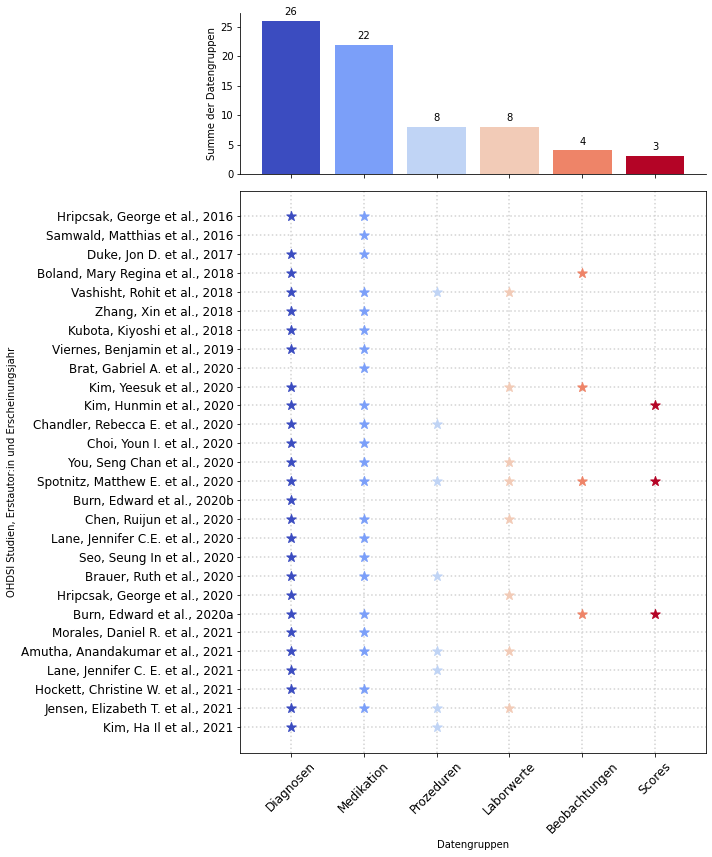

In [8]:


# Erstellen der Figure und Axes
fig, (ax_hist, ax_scatter) = plt.subplots(nrows=2, ncols=1, sharex=True,gridspec_kw={'height_ratios': [2, 7]}, figsize=(10, 12))

# Histogramm erstellen
column_sums = [np.sum(df_sorted[col] == 'yes') for col in columns]
x_ticks = np.arange(len(columns)) + 5
y_ticks = np.arange(len(df_sorted))

bars = ax_hist.bar(x_ticks, column_sums, color=color_palette)

# Summen innerhalb der Balken hinzufügen
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax_hist.text(bar.get_x() + bar.get_width() / 2,height + 1.5, str(int(height)), ha='center', va='center', color='black')

# Achsenbeschriftungen und Titel für Histogramm
ax_hist.set_ylabel('Summe der Datengruppen')

# Scatterplot erstellen
for i, name in enumerate(names_sorted):
    y = i + 1
    for j, col in enumerate(columns):
        x = j + 5
        if df_sorted.loc[i, col] == 'yes':
            ax_scatter.scatter(x, y, marker='*',s=100,  color=color_palette[j])

# Achsenbeschriftungen und Titel für Scatterplot
ax_scatter.set_ylabel('OHDSI Studien, Erstautor:in und Erscheinungsjahr')

# Anpassungen an den Achsenbeschriftungen
ax_scatter.set_xticks(x_ticks)
ax_scatter.set_xticklabels(columns, fontsize=12, rotation=45)
ax_scatter.set_xlabel('Datengruppen')


    
# Anpassungen an den Achsenbeschriftungen
ax_scatter.set_xticks(np.arange(5, 11))
ax_scatter.set_xticklabels(columns)
ax_scatter.set_yticks(np.arange(1, len(names_sorted)+1))
ax_scatter.set_yticklabels(names_sorted, fontsize=12)


# Linien oben und rechts entfernen
ax_hist.spines['top'].set_visible(False)
ax_hist.spines['right'].set_visible(False)

# Senkrechte Rasterlinien hinzufügen
for x in x_ticks:
    ax_scatter.axvline(x, color='lightgray', linestyle='dotted', zorder=-1)
    
# Waagerechte gestrichelte Rasterlinien hinzufügen
for y in range(1, len(names_sorted) + 1):
    ax_scatter.axhline(y, color='lightgray', linestyle='dotted', zorder=-1)

# Layout anpassen
plt.tight_layout()


# Plot speichern
fig.savefig('../data_results/00_literature_results/ohdsi_studies.png', dpi=400, format='png', bbox_inches='tight')

# Plot anzeigen
plt.show()